# The Simplest GNN


### Code Structure

1. Crear el objeto graph

   - Parámetros
     - Nodos
       - Features
     - Edges
       - Adjacency list
       - Features
     - Global features
       - Features

2. Crear objeto MLP


In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [54]:
# Graph class
import numpy as np
from typing import List, Union

class Graph:
    def __init__(self, 
                 nodes_features: Union[np.ndarray, List[List[float]]], 
                 adjacency_list: Union[List[List[int]], dict], 
                 edges_features: Union[np.ndarray, List[float]], 
                 global_features: Union[np.ndarray, List[float]]):
        """
        Initialize a graph object.

        Args:
        - nodes_features (np.ndarray or list of lists): Node features.
        - adjacency_list (list of lists or dict): Adjacency list representation of the graph.
        - edges_features (np.ndarray or list of floats): Edge features.
        - global_features (np.ndarray or list of floats): Global features.
        """
        self._nodes_features = nodes_features
        self._adjacency_list = adjacency_list
        self._edges_features = edges_features
        self._global_features = global_features

        self._num_nodes = self._get_num_nodes()
        self._num_edges = self._get_num_edges()
        self._nodes_feat_dim = self._get_nodes_feat_dim()
        self._edges_feat_dim = self._get_edges_feat_dim()
        self._global_feat_dim = self._get_global_feat_dim()

    def _get_num_nodes(self) -> int:
        # Get the number of nodes
        return len(self._nodes_features)

    def _get_num_edges(self) -> int:
        # Get the number of edges
        return len(self._adjacency_list)

    def _get_nodes_feat_dim(self) -> int:
        # Get the feature dimension of nodes
        return self._nodes_features.shape[1] if self._nodes_features.ndim > 1 else 0

    def _get_edges_feat_dim(self) -> int:
        # Get the feature dimension of edges
        return self._edges_features.shape[1] if self._edges_features.ndim > 1 else 0

    def _get_global_feat_dim(self) -> int:
        # Get the feature dimension of global features
        return self._global_features.shape[0] if self._global_features.ndim > 0 else 0

    @property
    def nodes_features(self) -> np.ndarray:
        return self._nodes_features

    @nodes_features.setter
    def nodes_features(self, nodes_features: np.ndarray):
        self._nodes_features = nodes_features
        self._num_nodes = self._get_num_nodes()
        self._nodes_feat_dim = self._get_nodes_feat_dim()

    @property
    def edges_features(self) -> np.ndarray:
        return self._edges_features

    @edges_features.setter
    def edges_features(self, edges_features: np.ndarray):
        self._edges_features = edges_features
        self._edges_feat_dim = self._get_edges_feat_dim()

    @property
    def global_features(self) -> np.ndarray:
        return self._global_features

    @global_features.setter
    def global_features(self, global_features: np.ndarray):
        self._global_features = global_features
        self._global_feat_dim = self._get_global_feat_dim()

    @property
    def adjacency_list(self) -> Union[List[List[int]], dict]:
        return self._adjacency_list

    @adjacency_list.setter
    def adjacency_list(self, adjacency_list: Union[List[List[int]], dict]):
        self._adjacency_list = adjacency_list
        self._num_edges = self._get_num_edges()

    def __repr__(self):
        return (f"Graph(num_nodes={self._num_nodes}, num_edges={self._num_edges}, "
                f"nodes_feat_dim={self._nodes_feat_dim}, edges_feat_dim={self._edges_feat_dim}, "
                f"global_feat_dim={self._global_feat_dim})")

In [55]:
# graph embbedings
nodes_features = np.array([(1, 25), (0, 43), (0, 8), (1, 18)])
adjacency_list = np.array([(1, 2), (1, 3), (2, 3), (3, 4)])
edges_features = np.array([0.3, 0.7, 0.1, 0.6])
global_features = np.array(['Neutro', 'Animal', 523])

# initialize Graph object
graph = Graph(nodes_features, adjacency_list, edges_features, global_features)

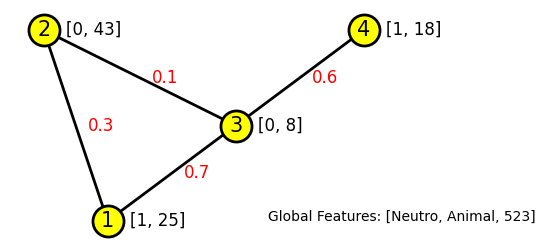

In [58]:
G = nx.Graph()
G.add_edges_from(graph.adjacency_list)
pos = {1: (0, 0), 2: (-1, 0.1), 3: (2, 0.05), 4: (4, 0.1)}

for node_id, feature_value in enumerate(graph.nodes_features):
    G.nodes[node_id+1]['feature'] = feature_value

options = {
    "font_size": 15,
    "node_size": 500,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}

plt.figure(figsize=(5, 3))
plt.axis("off")
nx.draw_networkx(G, pos, **options)
for node_id, feature_value in enumerate(graph.nodes_features):
    x, y = pos[node_id + 1]
    plt.text(x+0.35, y, f'[{feature_value[0]}, {feature_value[1]}]', fontsize=12,
             ha='left', va='center', bbox=dict(facecolor='gray', alpha=0, linewidth=0))

for idx, (u, v) in enumerate(G.edges()):
    x = (pos[u][0] + pos[v][0]) / 2 + 0.4
    y = (pos[u][1] + pos[v][1]) / 2
    plt.text(x, y, f'{edges_features[idx]}', fontsize=12, color='red',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0, linewidth=0))

global_features = graph.global_features
global_features_str = ', '.join(str(feat) for feat in global_features)
plt.text(2.5, 0, f'Global Features: [{global_features_str}]')

plt.show()


In [103]:
# MLP Layer class
class MLP():
    def __init__(self, w_matrix_shape, b_vector_shape):
        self.w_matrix = np.random.randn(*w_matrix_shape)
        self.b_vector = np.random.randn(*b_vector_shape)


In [104]:
graph._nodes_feat_dim

2

In [115]:
# Nodes MLP
w_matrix_shape = (graph._nodes_feat_dim, graph._nodes_feat_dim)
b_vector_shape = (graph._nodes_feat_dim,)
nodes_mlp = MLP(w_matrix_shape, b_vector_shape)

print(f'MLP weights matrix:')
print(nodes_mlp.w_matrix, '\n')
print(f'MLP bias vector:')
print(nodes_mlp.b_vector)

MLP weights matrix:
[[-0.71664824  2.26872987]
 [ 0.6009826   0.48798949]] 

MLP bias vector:
[-1.26386857 -0.49328976]


In [108]:
# Ejemplo Nodo 1
print('Valor Inicial:')
print(graph.nodes_features[0])

Valor Inicial:
[ 1 25]


In [129]:
# Matrix the pesos
print('Weights Matrix:')
print(nodes_mlp.w_matrix, '\n')

print('Bias Vector:')
print(nodes_mlp.b_vector)

Weights Matrix:
[[-0.71664824  2.26872987]
 [ 0.6009826   0.48798949]] 

Bias Vector:
[-1.26386857 -0.49328976]


In [130]:
# Apply the MLP layer
print('New Node 1 Features Values:')
new_node_1_features = np.dot(nodes_mlp.w_matrix,graph.nodes_features[0]) + nodes_mlp.b_vector
print(new_node_1_features)

New Node 1 Features Values:
[54.7377299 12.3074301]


In [131]:
print(nodes_mlp.w_matrix.shape)
print(graph.nodes_features[0].reshape(-1,1).shape)
print('\n')
print(np.dot(nodes_mlp.w_matrix,graph.nodes_features[0])+nodes_mlp.b_vector)
print(np.dot(nodes_mlp.w_matrix,graph.nodes_features[0].reshape(-1,1))+nodes_mlp.b_vector.reshape(-1,1))

(2, 2)
(2, 1)


[54.7377299 12.3074301]
[[54.7377299]
 [12.3074301]]


In [73]:
from ann_visualizer.visualize import ann_viz
from keras.models import Sequential
from keras.layers import Dense
import tf2onnx


model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Save the model to ONNX format
onnx_model, _ = tf2onnx.convert.from_keras(model, opset=13)
onnx_model_path = "model.onnx"

# Save the ONNX model to a file
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

In [79]:
ann_viz(model, view=False, filename="network.gv")

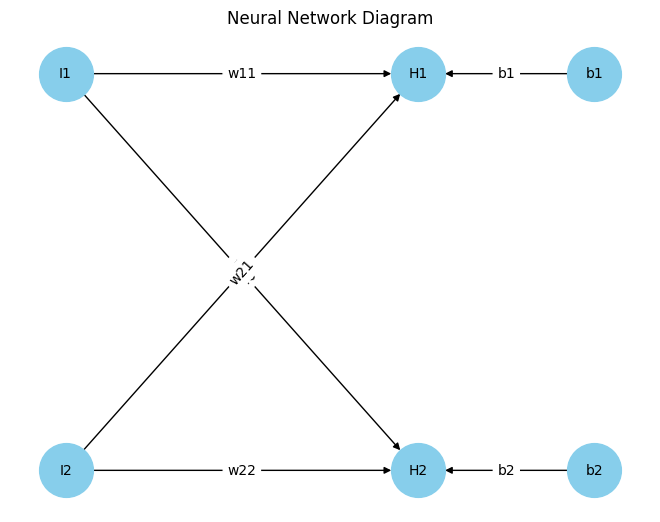

In [83]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add input layer nodes
G.add_node('I1', pos=(0, 1))  # Input neuron 1
G.add_node('I2', pos=(0, 0))  # Input neuron 2

# Add hidden layer nodes
G.add_node('H1', pos=(1, 1))  # Hidden neuron 1
G.add_node('H2', pos=(1, 0))  # Hidden neuron 2

# Add weights and biases
G.add_weighted_edges_from([('I1', 'H1', 'w11'), ('I1', 'H2', 'w12'), 
                           ('I2', 'H1', 'w21'), ('I2', 'H2', 'w22')])
G.add_node('b1', pos=(1.5, 1))  # Bias for H1
G.add_node('b2', pos=(1.5, 0))  # Bias for H2
G.add_edge('b1', 'H1', weight='b1')
G.add_edge('b2', 'H2', weight='b2')

# Position the nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Neural Network Diagram')
plt.show()


In [132]:
from graphviz import Digraph

# Crear un nuevo gráfico dirigido
dot = Digraph(comment='Audiences in Recommendation Systems')

# Fuentes de datos
dot.node('A', 'Data Sources')
dot.node('B', 'Demographic Data')
dot.node('C', 'Purchase Behavior')
dot.node('D', 'Google Analytics Data')
dot.node('E', 'Other Businesses Data (Paris, Easy)')

# Segmentación de audiencia
dot.node('F', 'Audience Segmentation')

# Motor de recomendaciones
dot.node('G', 'Recommendation Engine')

# Salida
dot.node('H', 'Personalized Recommendations')

# Crear las conexiones
dot.edges(['AB', 'AC', 'AD', 'AE'])  # Conexiones desde Data Sources a cada tipo de dato
dot.edge('B', 'F', 'Demographic Data')
dot.edge('C', 'F', 'Purchase Behavior')
dot.edge('D', 'F', 'Google Analytics Data')
dot.edge('E', 'F', 'Other Businesses Data')

dot.edge('F', 'G', 'Segmented Audiences')
dot.edge('G', 'H', 'Recommendations')

# Renderizar el gráfico a un archivo
dot.render('audience_recommendation_system.gv', view=True)

'audience_recommendation_system.gv.pdf'